In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import timeit
import datetime
import time
import pprint
import itertools
import pickle
import sklearn
import dask
import os
os.chdir('/mnt/t48/bighomes-active/sfeng/patentdiffusion/')
import fastparquet
seed = 3
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import h5py
import collections
import dask.dataframe as dd

/homedir/eco/sfeng/bigdata/python/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


- Geography of new innovation: https://sfengc7.stern.nyu.edu:8888/notebooks/patentdiffusion/201808Results/ExogSpillovers/2a-UniversityPatents-v2.ipynb

## Similarity in locations and HHI of new terms over time

In [8]:
py = pd.read_pickle("DataStore/2018-06/newterm_pat_year_0614.pkl")
pdf = fastparquet.ParquetFile("RawData/Cleaned/patent_loc_unique_us_0628.parq").to_pandas(\
                            ["patent", "inv_msa", "primclass", "naics_name", "title"])
py = py.merge(pdf, how="left", on="patent")

In [18]:
py.columns

Index(['firstyear', 'patent', 'term', 'appyear', 'yr_from_first', 'inv_msa',
       'primclass', 'naics_name', 'title'],
      dtype='object')

### All Terms

In [26]:
mc = "inv_msa"
t = "xml"

# All terms
ploc = py[[mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Select terms
# ploc = py.loc[(py["term"] == t), [mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Only use those places with greater than 10 patents
ploc = ploc.pivot(index="yr_from_first", columns=mc, values="patent").fillna(0)

# Get proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Delete rows that average less than 1%
ploc = ploc[ploc.columns[ploc.apply(lambda x: x.mean()>0.01, axis=0)]]

# Reapply proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Get number of cities
print(len(ploc.columns))

sim = 1-sp.spatial.distance.cdist(ploc.values,ploc.values,metric="cosine")
# Make dataframe
sim = pd.DataFrame(sim, columns=list(range(10)), index=list(range(10))).unstack().reset_index()
sim.columns=["lag1", "lag2", "sim_location"]
sim["lag"] = sim["lag1"]-sim["lag2"]


21


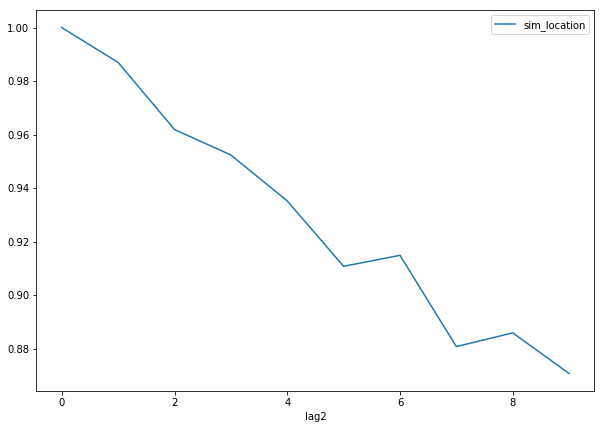

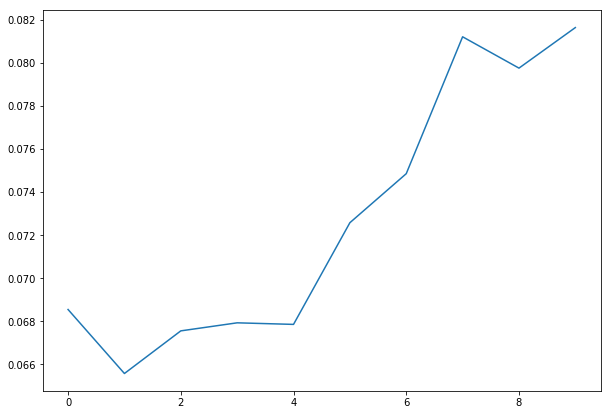

In [27]:
%matplotlib inline
# Plot
fig, ax = plt.subplots(figsize=(10,7))
sim1 = sim.loc[sim["lag1"] == 0, ["lag2", "sim_location"]].set_index("lag2")
sim1.plot.line(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
hhi = pd.Series(np.sum(ploc.values**2,axis=1), index = list(range(10)))
hhi.plot.line(ax=ax)
plt.show()

### Term 1: XML

In [20]:
mc = "inv_msa"
t = "xml"

# All terms
ploc = py[[mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Select terms
ploc = py.loc[(py["term"] == t), [mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Only use those places with greater than 10 patents
ploc = ploc.pivot(index="yr_from_first", columns=mc, values="patent").fillna(0)

# Get proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Delete rows that average less than 1%
ploc = ploc[ploc.columns[ploc.apply(lambda x: x.mean()>0.01, axis=0)]]

# Reapply proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Get number of cities
print(len(ploc.columns))

17


In [21]:
sim = 1-sp.spatial.distance.cdist(ploc.values,ploc.values,metric="cosine")
# Make dataframe
sim = pd.DataFrame(sim, columns=list(range(10)), index=list(range(10))).unstack().reset_index()
sim.columns=["lag1", "lag2", "sim_location"]
sim["lag"] = sim["lag1"]-sim["lag2"]

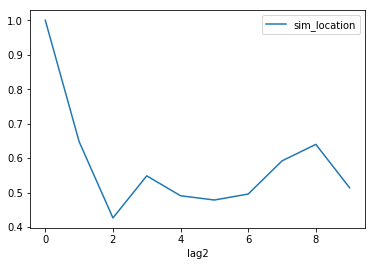

In [22]:
%matplotlib inline
# Plot
sim1 = sim.loc[sim["lag1"] == 0, ["lag2", "sim_location"]].set_index("lag2")
sim1.plot.line()

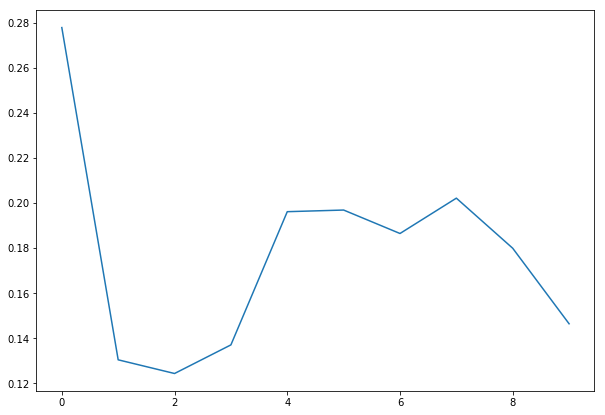

In [23]:
%matplotlib inline
# Plot
fig, ax = plt.subplots(figsize=(10,7))
hhi = pd.Series(np.sum(ploc.values**2,axis=1), index = list(range(10)))
hhi.plot.line()

### Term 2: Adenovir

In [31]:
mc = "inv_msa"
t = "adenovir"

# All terms
# ploc = py[[mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Select terms
ploc = py.loc[(py["term"] == t), [mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Only use those places with greater than 10 patents
ploc = ploc.pivot(index="yr_from_first", columns=mc, values="patent").fillna(0)

# Get proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Delete rows that average less than 1%
ploc = ploc[ploc.columns[ploc.apply(lambda x: x.mean()>0.01, axis=0)]]

# Reapply proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Get number of cities
print(len(ploc.columns))

sim = 1-sp.spatial.distance.cdist(ploc.values,ploc.values,metric="cosine")
# Make dataframe
sim = pd.DataFrame(sim, columns=list(range(10)), index=list(range(10))).unstack().reset_index()
sim.columns=["lag1", "lag2", "sim_location"]
sim["lag"] = sim["lag1"]-sim["lag2"]


17


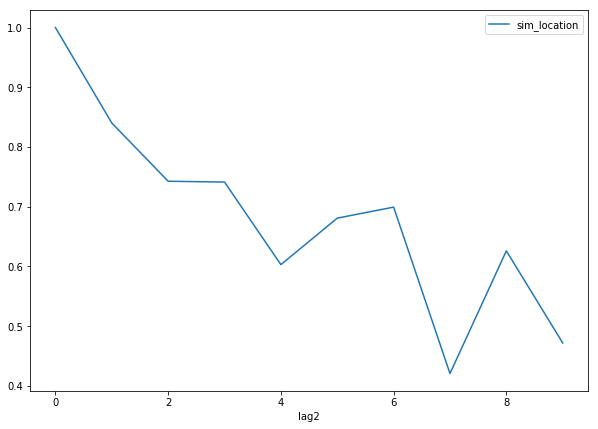

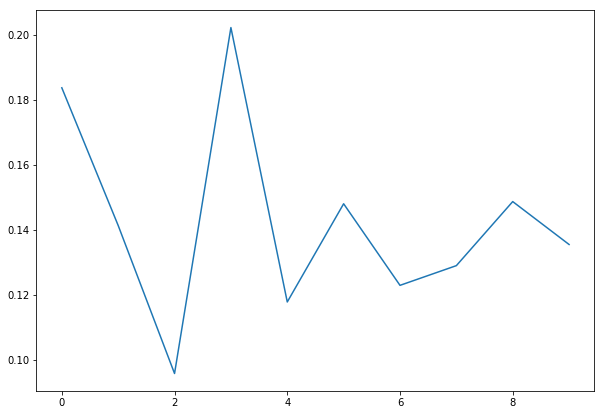

In [32]:
%matplotlib inline
# Plot
fig, ax = plt.subplots(figsize=(10,7))
sim1 = sim.loc[sim["lag1"] == 0, ["lag2", "sim_location"]].set_index("lag2")
sim1.plot.line(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
hhi = pd.Series(np.sum(ploc.values**2,axis=1), index = list(range(10)))
hhi.plot.line(ax=ax)
plt.show()

### Term 3: HTML

In [33]:
mc = "inv_msa"
t = "html"

# All terms
# ploc = py[[mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Select terms
ploc = py.loc[(py["term"] == t), [mc, "yr_from_first", "patent"]].groupby([mc, "yr_from_first"]).count().reset_index()

# Only use those places with greater than 10 patents
ploc = ploc.pivot(index="yr_from_first", columns=mc, values="patent").fillna(0)

# Get proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Delete rows that average less than 1%
ploc = ploc[ploc.columns[ploc.apply(lambda x: x.mean()>0.01, axis=0)]]

# Reapply proportions
ploc = ploc.apply(lambda x: x/x.sum(), axis=1)

# Get number of cities
print(len(ploc.columns))

sim = 1-sp.spatial.distance.cdist(ploc.values,ploc.values,metric="cosine")
# Make dataframe
sim = pd.DataFrame(sim, columns=list(range(10)), index=list(range(10))).unstack().reset_index()
sim.columns=["lag1", "lag2", "sim_location"]
sim["lag"] = sim["lag1"]-sim["lag2"]


20


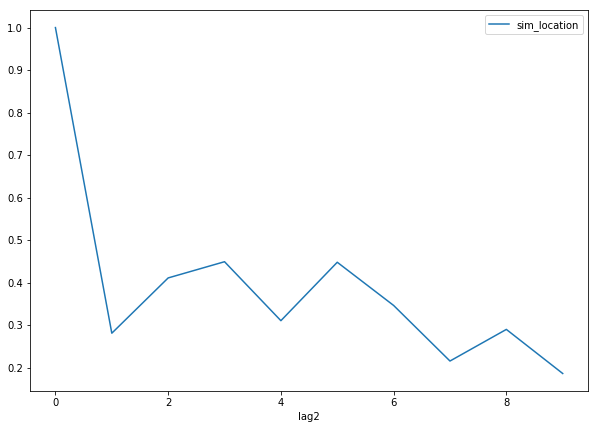

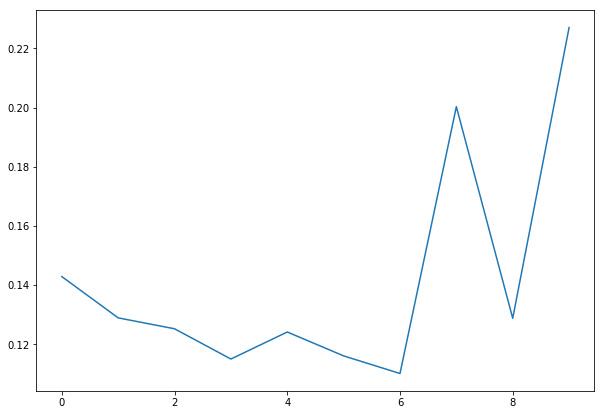

In [34]:
%matplotlib inline
# Plot
fig, ax = plt.subplots(figsize=(10,7))
sim1 = sim.loc[sim["lag1"] == 0, ["lag2", "sim_location"]].set_index("lag2")
sim1.plot.line(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
hhi = pd.Series(np.sum(ploc.values**2,axis=1), index = list(range(10)))
hhi.plot.line(ax=ax)
plt.show()